# Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the Rapper network. 
This is the outline for today:

* Visualization and qualitative analysis of the Rapper Network
* Properties of the network structure, including how attributes and other properties shape the network

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into [Section 9.4](http://networksciencebook.com/chapter/9#modularity) in the exercises below. We will also talk a little bit about degree correlations - you can read about those in [Chapter 7](http://networksciencebook.com/chapter/7)\.


![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")


In [1]:
import pickle

# load graph object from file
G = pickle.load(open('./Week4_graph.pickle', 'rb'))
SEED = 1234

---
# Part A: Let's  visualise!

We will continue to work with the network from last week, see the lecture for [Week 4](https://nbviewer.jupyter.org/github/socialcomplexitylab/socialgraphs2021/blob/main/lectures/Week4.ipynb) for details. This is important! Actually, in order to continue with the lecture, you *need* to complete Week 4. 

## *Exercise 1:* Build the right graph for visualization:

>1. Use NetworkX `DiGraph` to store the network of rappers. Remember that rappers are linked if they have a corresponding link between their Wiki contents.
>   * **Additionally**, extract the largest component - it will make our work with visualizations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have around 730 nodes and 6000 edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component.
>     - *Note 3*: Further analysis is done with the largest component

In [2]:
print(f"At first we have the following graph:")
print(f"\tNumber of nodes: {len(G.nodes)}\t & \t Number of edges: {len(G.edges)}")

At first we have the following graph:
	Number of nodes: 797	 & 	 Number of edges: 5805


In [3]:
import networkx as nx

largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

In [4]:
print(f"The largest component has the following:")
print(f"\tNumber of nodes: {len(G.nodes)}\t & \t Number of edges: {len(G.edges)}")
print(f"It seems to follow the conditions the exercise statement describes.")

The largest component has the following:
	Number of nodes: 727	 & 	 Number of edges: 5803
It seems to follow the conditions the exercise statement describes.


>2. As you build the graph, store the attributes of the nodes (their `coast`). On top of that, let's also store the `length of the content` as one of the attributes of the node (i.e. count the number of *words* you have in each rapper's page). By storing this information as nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.

Week4 notebook will be modified to also count words. 

In [5]:
G.nodes['6ix9ine']

{'coast': 'east', 'contentLength': 18447}

## *Exercise 2:* Let's build a simple visualization of the network

>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises

In [6]:
DIRECTED_GRAPH = G # directed graph
UNDIRECTED_GRAPH = G.to_undirected() #undirected graph

>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Node color should depend on the `coast` attribute (i.e. use different colors for west-coast and east-coast rappers).
>   * Set up your plot so that node-size depends on the node *degree*
>   * **Optional**: Set up you plot so that edge color depends on the `role` attribute. If an edge connects west-coast rappers, assign `color_a`, if the edge connects east-coast rappers assign `color_b`, in other cases assign `color_c` (i.e. when rapper from different coasts are connected). (Here, you get to decide on the colors.)

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = UNDIRECTED_GRAPH
node_colors_dict = {"west": "yellow", "east": "purple"}
color_a = "orange"
color_b = "cyan"
color_c = "grey"
edge_colors_dict = {"west-east": color_c, "east-west": color_c, "west-west": color_a, "east-east": color_b}
edge_widths_dict = {"west-east": 0.5, "east-west": 0.5, "west-west": 0.2, "east-east": 0.2}
node_colors = [node_colors_dict[G.nodes[n]['coast']] for n in G.nodes()]
edge_colors = [edge_colors_dict[f"{G.nodes[u]['coast']}-{G.nodes[v]['coast']}"] for (u, v) in G.edges()]
edge_widths = [edge_widths_dict[f"{G.nodes[u]['coast']}-{G.nodes[v]['coast']}"] for (u, v) in G.edges()]

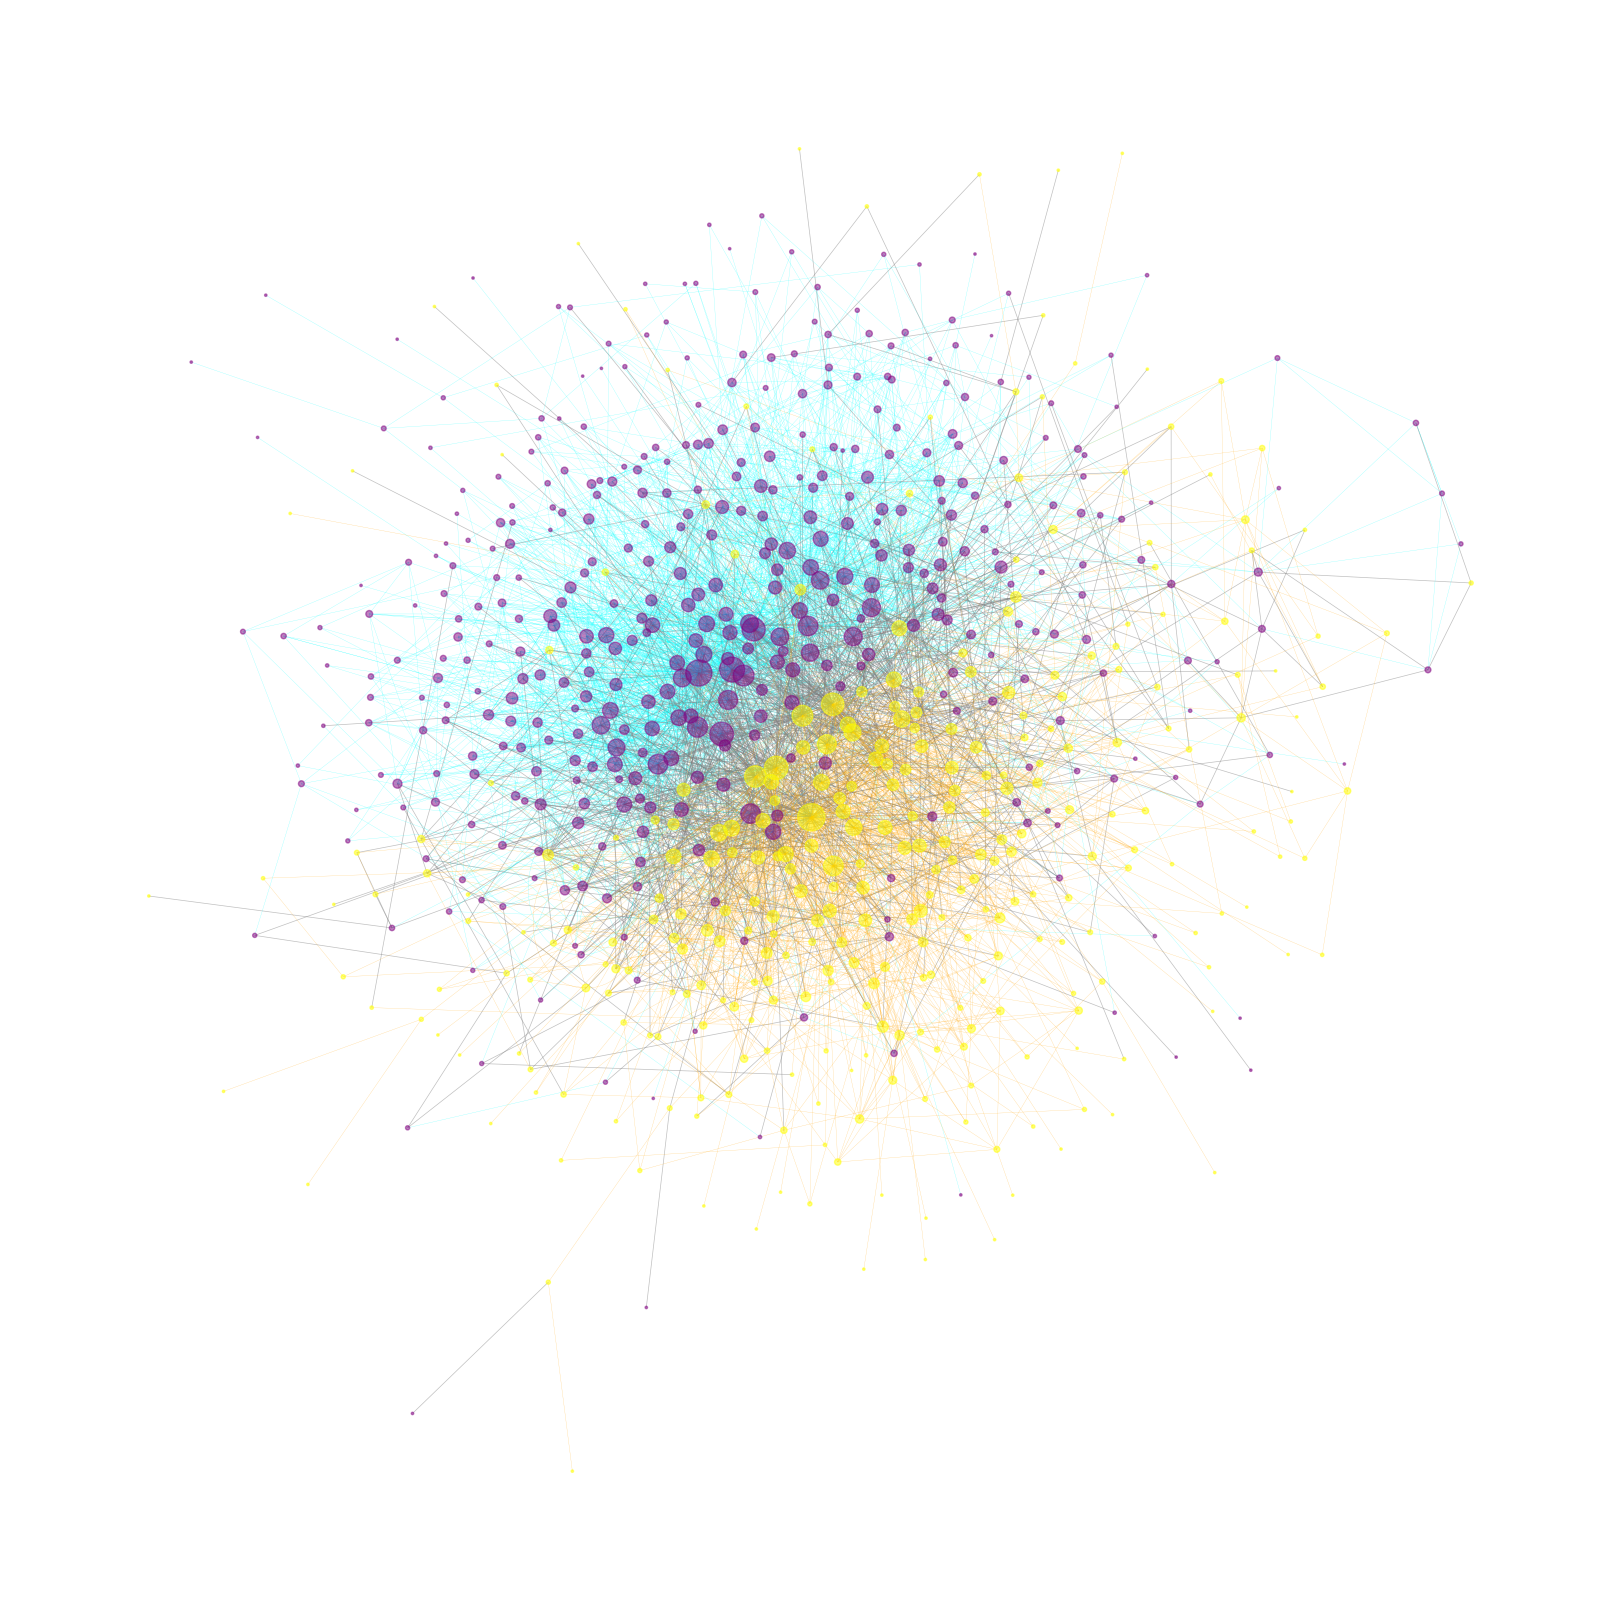

In [8]:
plt.figure(1,figsize=(16,16))
d = dict(G.degree)
nx.draw_kamada_kawai(G, node_size=[v * 3 for v in d.values()], node_color = node_colors, edge_color=edge_colors,width=edge_widths, alpha=0.5)

## *Exercise 3:* From the previous plot it is more difficult to observe any specific structure in the network. We can make even better visualisations with `ForceAtlas2` package:

>1. [Force Atlas 2 algorithm](https://github.com/bhargavchippada/forceatlas2) helps to determine the positions of the nodes (see what the result looks like below).
>2. You can install the  package typing `pip install fa2` in the terminal. The [github page](https://github.com/bhargavchippada/forceatlas2) explains how to use the package to get coordinates for each node.
>   * (**Hint**: if you install force atlas and Python can't find the package it might be because you computer tries to use the system's `pip`, therefore, try installing using the Anaconda pip explicitly ( on mac you would use `~/anaconda2/bin/pip install fa2`).
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and node-coordinates from the force atlas algorithm. As in the previous Exercise:
>   * Node color should depend on the `coast` attribute (i.e. use different colors for west-coast and east-coast rappers)
>   * Node size should depend on the node *degree*
>   * **Optional**: edge color should depend on the `coast` attribute. If an edge connects west-coast rappers, assign `color_a`, if the edge connects east-coast rappers from  assign `color_b`, in other cases assign `color_c` (i.e. when connected rappers are from different coasts).
> * Play with the force atlas algorithm parameters to obtain a visualization you like. It may look similar to the one below (but not necessarily). 
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?





![Visualfa2Rappers.png](./Visualfa2Rappers.png)

![](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Visualfa2Rappers.pngraw=true)

*Exercise 4*: We continue with a qualitative inspection of the rapper Wiki pages, that will help us to intepret our results. We investigate the reasons for links between rappers to exist on rapper Wiki.

>1. Consider the top 3 nodes with highest in-degree in the network. Open the corresponding Wiki pages.
>   * Consider the set of neighbours pointing towards the node found above. Look for them in the page. 
>   * What is the relation between the rappers you identified and his/her network neighbours? (e.g., do they come from the same coast, did they write songs together, etc.). You don't need to come up with a grand theory of rap music here, I just want you to think about how links come about.

In [9]:
G = DIRECTED_GRAPH
top = 3
most_connected_in = sorted(dict(G.in_degree).items(), key=lambda x:x[1], reverse=True)[0:top]
most_connected_in

[('Snoop Dogg', 127), ('Jay-Z', 114), ('Nas', 98)]

In [10]:
for rapper, count in most_connected_in:
    
    in_neighbours = [ u for u,v in G.edges if v == rapper]
    out_neighbours = [ v for u,v in G.edges if u == rapper]
    in_east_coast_neigh = [neig for neig in in_neighbours if G.nodes[neig]['coast'] == "east"]
    in_west_coast_neigh = [neig for neig in in_neighbours if G.nodes[neig]['coast'] == "west"]
    out_east_coast_neigh = [neig for neig in out_neighbours if G.nodes[neig]['coast'] == "east"]
    out_west_coast_neigh = [neig for neig in out_neighbours if G.nodes[neig]['coast'] == "west"]
    rapper_coast = G.nodes[rapper]['coast']
    print(f">{rapper} ({rapper_coast}-coast)")
    print(f" Neighbours: {in_neighbours}")
    if rapper_coast == "west":
        in_coast_neigh = in_west_coast_neigh
    else:
        in_coast_neigh = in_east_coast_neigh
    print(f"\tSummary: Total: {len(in_neighbours)} --- Same coast {100*len(in_coast_neigh)/len(in_neighbours):.2f}% " + 
            f" --- Refers back {100*len([el for el in in_neighbours if el in out_neighbours])/len(in_neighbours):.2f}%")
    east_refer_back = [el for el in in_east_coast_neigh if el in out_neighbours]
    west_refer_back = [el for el in in_west_coast_neigh if el in out_neighbours]
    print(f"\t\tEast coast: {len(in_east_coast_neigh)} (of those, {len(east_refer_back)} ({100*len(east_refer_back)/len(in_east_coast_neigh):.2f}%) are reffered back)")
    print(f"\t\tWest coast: {len(in_west_coast_neigh)} (of those, {len(west_refer_back)} ({100*len(west_refer_back)/len(in_west_coast_neigh):.2f}%) are reffered back)")

>Snoop Dogg (west-coast)
 Neighbours: ['M. K. Asante', 'Mark Batson', 'The Beat Bully', 'Benny the Butcher', 'Foxy Brown (rapper)', 'Call Me Ace', 'Kid Capri', 'Cardi B', 'Cardiak', 'Kosha Dillz', 'DMX', 'Tim Dog', 'DJ Drama', 'Dave East', 'Eve (rapper)', 'Focus...', 'Funkmaster Flex', 'Inspectah Deck', 'Jadakiss', 'Jay-Z', 'Wiz Khalifa', 'Lil Dicky', 'Lil Mama', 'Megahertz (record producer)', 'Mims (rapper)', 'Andy Mineo', 'French Montana', 'The Notorious B.I.G.', "Shaquille O'Neal", 'Felicia Pearson', 'DJ Premier', 'Princess Superstar', 'Salaam Remi', 'Scar Lip', 'Sha Money XL', 'Kiing Shooter', 'Silkski', 'DJ Skee', 'David Stones', 'Fetty Wap', 'DJ Whoo Kid', 'Young M.A', 'The Alchemist (musician)', 'B-Legit', 'B-Real', 'Ant Banks', 'Becky G', 'Big Dave (rapper)', 'Big Ed (rapper)', 'Blueface', 'Blxst', 'Buddy (rapper)', 'Chanel West Coast', 'Coolio', 'Crooked I', 'The D.O.C.', 'Demrick', 'Scoop DeVille', 'Daz Dillinger', 'Nate Dogg', 'Domino (rapper)', 'Drakeo the Ruler', 'Dr. Dre'

> **Solution**: It's a bit difficult to gleam data about neighbours point toward a node by only looking at the Wikipedia page of the node. However, if we summarize the data in a convinient way, we can see that the rappers that refer to these hubs are same-coast rappers an average of 75% of the time. Also, an average of 20% of the time, the rapper refers back to the in-connection. As we can expect, probably because the Wikipedia article's length does not grow at the same speed than the number of page's pointing to it, the larger the degree of the hub, the probability of referring back is lower. We can also see that it's more probable that they refer back to rappers of the same coast.
>
> Overall, the result makes sense, because these rappers are really famous rapper that probably have influenced a lot of other rappers, without the need of mentioning them in the Wikipedia article.

>   * Repeat the exercise for the top 3 out-degree node. 
>   * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur between rappers.

In [11]:
most_connected_out = sorted(dict(G.out_degree).items(), key=lambda x:x[1], reverse=True)[0:top]
most_connected_out

[('Drag-On', 52), ('Black Thought', 42), ('DJ Dahi', 38)]

In [12]:
for rapper, count in most_connected_out:
    
    in_neighbours = [ u for u,v in G.edges if v == rapper]
    out_neighbours = [ v for u,v in G.edges if u == rapper]
    in_east_coast_neigh = [neig for neig in in_neighbours if G.nodes[neig]['coast'] == "east"]
    in_west_coast_neigh = [neig for neig in in_neighbours if G.nodes[neig]['coast'] == "west"]
    out_east_coast_neigh = [neig for neig in out_neighbours if G.nodes[neig]['coast'] == "east"]
    out_west_coast_neigh = [neig for neig in out_neighbours if G.nodes[neig]['coast'] == "west"]
    rapper_coast = G.nodes[rapper]['coast']
    print(f">{rapper} ({rapper_coast}-coast)")
    print(f" Neighbours: {out_neighbours}")
    if rapper_coast == "west":
        out_coast_neigh = out_west_coast_neigh
    else:
        out_coast_neigh = out_east_coast_neigh
    print(f"\tSummary: Total: {len(out_neighbours)} --- Same coast {100*len(out_coast_neigh)/len(out_neighbours):.2f}% " + 
            f" --- Refers back {100*len([el for el in out_neighbours if el in in_neighbours])/len(out_neighbours):.2f}%")
    east_refer_back = [el for el in out_east_coast_neigh if el in in_neighbours]
    west_refer_back = [el for el in out_west_coast_neigh if el in in_neighbours]
    print(f"\t\tEast coast: {len(out_east_coast_neigh)} (of those, {len(east_refer_back)} ({100*len(east_refer_back)/len(out_east_coast_neigh):.2f}%) are reffered back)")
    print(f"\t\tWest coast: {len(out_west_coast_neigh)} (of those, {len(west_refer_back)} ({100*len(west_refer_back)/len(out_west_coast_neigh):.2f}%) are reffered back)")

>Drag-On (east-coast)
 Neighbours: ['Swizz Beatz', 'DMX', 'Eve (rapper)', 'Jadakiss', 'Styles P', 'Beanie Sigel', 'Warren G', 'Memphis Bleek', 'Big Pun', 'Fat Joe', 'Remy Ma', 'Petey Pablo', 'Sheek Louch', "Ol' Dirty Bastard", 'Jae Millz', 'DJ Kay Slay', 'Dave East', 'Crooked I', 'Black Thought', 'Conway the Machine', 'Ghostface Killah', 'Inspectah Deck', 'AZ (rapper)', 'Fred the Godson', 'Joell Ortiz', 'Cory Gunz', "Shaquille O'Neal", 'Redman (rapper)', 'Big Daddy Kane', 'KRS-One', 'Cassidy (rapper)', 'Freddie Foxxx', 'Ice-T', 'Treach', 'Kool G Rap', "Lil' Cease", 'J.R. Writer', 'Vado (rapper)', 'Mistah F.A.B.', 'Saigon (rapper)', 'Melle Mel', 'Grandmaster Caz', 'Havoc (musician)', 'E.D.I. Mean', 'Young Noble', 'McGruff (rapper)', 'Ras Kass', 'Termanology', 'Uncle Murda', 'Consequence (rapper)', 'Bodega Bamz', 'Sauce Money']
	Summary: Total: 52 --- Same coast 90.38%  --- Refers back 5.77%
		East coast: 47 (of those, 3 (6.38%) are reffered back)
		West coast: 5 (of those, 0 (0.00%) are

> **Solution**: When looking at their Wikipedia pages, *Drag-On* and *Black-thought* rappers that have a lot of guest appearances and miscellaneous stuff listed in their page. The former seemse to not be very relevent, since his refer-back rate is very low. The latter, however, has a higher refer-back rate, which suggests he's more relevant. In the case of *DJ Dahi*, que seems a prolific producer, which explains the low refer-back rate, rather than his relevance, since producers are not always mentioned in song credits.
>
> In the same way as before, the out-connections seem to be mainly to the same coast (an average of 85% of the time). 

>2. Are there any nodes with high out-degree and with few incoming connections? If yes, open the Wiki pages of such rappers and explain what happens?

In [13]:
import math
calc = dict()
for rapper in G.nodes():
    if G.in_degree[rapper] == 0:
        calc[rapper] = math.inf
    else:
        calc[rapper] = G.out_degree[rapper] / G.in_degree[rapper]

In [14]:
most_ratio_out_in = sorted(calc.items(), key=lambda x:x[1], reverse=True)
print(f"There are {len([el for el in most_ratio_out_in if el[1] == math.inf])} rappers without any in-connection.")
top = 5
[el for el in most_ratio_out_in if el[1] < math.inf][0:top]

There are 134 rappers without any in-connection.


[('Vinylz', 21.0),
 ('Mike Free', 17.0),
 ('Ty Fyffe', 15.0),
 ('Phresher', 14.0),
 ('Mark Batson', 13.0)]

> **Solution**: Besides the 134 rappers without any incoming connections, from the top 5 of rappers with high *out-degree/in-degree* ratio, 4 are producers, which is consisten with the trend we've seen during this week's exercises where producers' wiki pages are more likely to mention if they've collaborated with a rapper than the other way around. 

In [15]:
import math
calc = dict()
for rapper in G.nodes():
    if G.out_degree[rapper] == 0:
        calc[rapper] = math.inf
    else:
        calc[rapper] = G.in_degree[rapper] / G.out_degree[rapper]

> **Solution**: Besides the 31 rappers without any outgoing connections, the top 20 rappers with high *in-degree/out-degree* ratio seems to be composed by rappers that are very famous, both for their career as rappers and some for their other careers (like acting), and rappers that are influential in a very niche subgenre.

>3. Are there any nodes with high in-degree and few outcoming connections? Again, open the Wiki pages of such rappers and explain what happens?

In [16]:
most_ratio_in_out = sorted(calc.items(), key=lambda x:x[1], reverse=True)
print(f"There are {len([el for el in most_ratio_in_out if el[1] == math.inf])} rappers without any out-connection.")
top = 20
[el for el in most_ratio_in_out if el[1] < math.inf][0:top]

There are 31 rappers without any out-connection.


[('Will Smith', 15.0),
 ('Redman (rapper)', 11.0),
 ('B-Real', 9.0),
 ('Keak da Sneak', 9.0),
 ('Mack 10', 8.5),
 ('Ghostface Killah', 7.4),
 ('Fetty Wap', 7.0),
 ('Mickey Factz', 6.0),
 ('Ed Lover', 6.0),
 ('San Quinn', 6.0),
 ('Snoop Dogg', 5.7727272727272725),
 ('Murs (rapper)', 5.75),
 ('Styles P', 5.25),
 ('Cassidy (rapper)', 5.0),
 ('Sage the Gemini', 5.0),
 ('Mac Dre', 4.75),
 ('KRS-One', 4.666666666666667),
 ('Guru (rapper)', 4.5),
 ('Wiz Khalifa', 4.461538461538462),
 ('Sheek Louch', 4.25)]

>4. Do any nodes have particularly many links to rappers from the opposite coast? If yes, try and find out what is going on.

In [17]:
G = UNDIRECTED_GRAPH
east_rappers = [rapper for rapper in G.nodes if G.nodes[rapper]['coast'] == 'east']
west_rappers = [rapper for rapper in G.nodes if G.nodes[rapper]['coast'] == 'west']

In [18]:
import math
calc = dict()

for rapper in G.nodes():
    if rapper in east_rappers:
        count_coast = west_rappers
    else:
        count_coast = east_rappers
    if sum([1 for v in G.neighbors(rapper)]) == 0:
        calc[rapper] = math.inf
    else:
        calc[rapper] = 100*sum([1 for v in G.neighbors(rapper) if v in count_coast]) / sum([1 for v in G.neighbors(rapper)])

most_ratio_opposite_coast = sorted(calc.items(), key=lambda x:x[1], reverse=True)
print(f"There are {len([el for el in most_ratio_opposite_coast if el[1] == math.inf])} rappers without any connection.")
top = 20
print(f"There are {len([el for el in most_ratio_opposite_coast if el[1] == 100])} rappers with all connections to hte opposite coast.")

[el for el in most_ratio_opposite_coast if el[1]][0:top]

There are 0 rappers without any connection.
There are 20 rappers with all connections to hte opposite coast.


[('Awkwafina', 100.0),
 ('David Rush (rapper)', 100.0),
 ('Sensato del Patio', 100.0),
 ('Yhaunai Takiyal', 100.0),
 ('Aminé (rapper)', 100.0),
 ('Toni Blackman', 100.0),
 ('Bones (rapper)', 100.0),
 ('Celestaphone', 100.0),
 ('Eprhyme', 100.0),
 ('Jel (music producer)', 100.0),
 ('Lefty (rapper)', 100.0),
 ('Emcee N.I.C.E.', 100.0),
 ('Only Won', 100.0),
 ('Captain Rapp', 100.0),
 ('V. Rose', 100.0),
 ('Sadistik', 100.0),
 ('Amanda Seales', 100.0),
 ('Dom Sicily', 100.0),
 ('Skee-Lo', 100.0),
 ('MC Trouble', 100.0)]

In [19]:
import math
calc = dict()

for rapper in G.nodes():
    if rapper in east_rappers:
        count_coast = west_rappers
    else:
        count_coast = east_rappers
    calc[rapper] = sum([1 for v in G.neighbors(rapper) if v in count_coast])

most_opposite_coast = sorted(calc.items(), key=lambda x:x[1], reverse=True)
top = 20
[el for el in most_opposite_coast][0:top]

[('Snoop Dogg', 44),
 ('Kendrick Lamar', 42),
 ('Tupac Shakur', 40),
 ('Dr. Dre', 38),
 ('The Game (rapper)', 37),
 ('50 Cent', 34),
 ('Wiz Khalifa', 29),
 ('The Alchemist (musician)', 28),
 ('Jay-Z', 24),
 ('Nas', 24),
 ('Kurupt', 22),
 ('Ice-T', 21),
 ('Talib Kweli', 20),
 ('Ras Kass', 20),
 ('The Notorious B.I.G.', 18),
 ('Ty Dolla Sign', 18),
 ('Mac Miller', 17),
 ('French Montana', 17),
 ('Focus...', 15),
 ('Busta Rhymes', 15)]

> **Solution**: In absolut values, the rappers with the most opposite-coast connections are still the most influential ones, with the most connections in general. However, if we study the relative values (% of opposite-coast connections over all connections), we can see that there are quite a lot of rappers that have an > 80% of opposite-coast connections. Doing a cursory examination of some of their Wikipedia pages, we can see that they are less well-known rappers that have little connections with other rappers but happen to have a connection to the other coast, or rappers that were born in one coast but moved to the opposite.

# Part B:  Advanced tools 

> **Video lecture**: [*Network measures*.](https://www.dropbox.com/scl/fi/8dal16z6z2b7lqhwq2f1j/NetworkMeasures.mp4?rlkey=c0imv3tewun2ivoxgtqrrov31&dl=0) Link: https://www.dropbox.com/scl/fi/8dal16z6z2b7lqhwq2f1j/NetworkMeasures.mp4?rlkey=c0imv3tewun2ivoxgtqrrov31&dl=0

## *Exercise 1:* Last time we visually analyzed (plotted) the degree distributions of our network. 

Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

>1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
>    * On top of that, calculate same statistics separately for the network that is spanned only by east-coast rappers and only by west-coast rappers. How do you interpret the results? 

In [20]:
import networkx as nx
import numpy as np
from scipy import stats as st
G = DIRECTED_GRAPH
def getSummaryStatistics(G: nx.DiGraph, dtype = 'in'):
    if dtype == 'in':
        d = np.array(list(dict(G.in_degree).values()))
    elif dtype == 'out':
        d = np.array(list(dict(G.out_degree).values()))
    return {
        "average": d.mean(),
        "median": np.median(d),
        "mode": st.mode(d).mode,
        "min": d.min() ,
        "max": d.max()
    }
def printSummaryStatistics(d, dtype = 'in'):
    if type(d) == nx.DiGraph:
        d = getSummaryStatistics(d, dtype)
    print(f"Summary statistics ({dtype}):")
    print(f"\tAverage: {d['average']}")
    print(f"\tMedian: {d['median']}")
    print(f"\tMode: {d['mode']}")
    print(f"\tMin: {d['min']}")
    print(f"\tMax: {d['max']}")


In [21]:
east_G = G.subgraph([el for el in G.nodes if el in east_rappers])
west_G = G.subgraph([el for el in G.nodes if el in west_rappers])

In [22]:
import pandas as pd

graphs = [(G, "whole"), (east_G, "east-coast"), (west_G, "west-coast")]
directions = ['in', 'out']

df = pd.DataFrame(columns=['graph', 'direction', "average", "median", "mode", "min", "max"])

for (g,g_name) in graphs:
    for dir in directions:
        d = getSummaryStatistics(g, dir)
        d['graph'] = g_name
        d['direction'] = dir
        df.loc[len(df)] = d
df

,graph,direction,average,median,mode,min,max
0,whole,in,7.982118,3.0,0,0,127
1,whole,out,7.982118,6.0,2,0,52
2,east-coast,in,7.052885,3.0,0,0,92
3,east-coast,out,7.052885,5.0,3,0,47
4,west-coast,in,5.183280,2.0,0,0,85
5,west-coast,out,5.183280,4.0,1,0,28


> **Solution**: The average degree is always  the same between both directions in all the different graphs, as it must be. Also, it's also obvious that the average of the whole graph is greater than the divided graphs, because dividing only implies breaking up connections. Furthermore, we can see that, as the average degree in the east-coast is greater than in the west-coast, the former is more connected. In general, we can also see that in the case for in-connection, the mode is 0, so there are a lot of rappers that are not referenced by anyone else, and the median is lower in the 'in' direction than the 'out' direction, which implies that typically rappers reference other rappers more often than rappers are referred from other rappers. However, the max values are higher in the 'in' direction, probably due to very influential rappers.

>2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)*
>    * To calculate it, you can install `powerlaw` package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. What does it say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Some long time ago, couple of scientist have analyzed the network that is spanned by the whole Wikipedia (paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A**? If not, why? 

In [23]:
import powerlaw
in_alpha = powerlaw.Fit(list(dict(G.in_degree).values())).alpha
out_alpha = powerlaw.Fit(list(dict(G.out_degree).values())).alpha
total_alpha = powerlaw.Fit(list(dict(G.degree).values())).alpha

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [24]:
print(f"Exponent of the degree distribution")
print(f"In: {in_alpha:.2f}\tOut: {out_alpha:.2f}\tTotal: {total_alpha:.2f}")

Exponent of the degree distribution
In: 2.73	Out: 12.24	Total: 3.53


> **Solution**: This tells us that the in-degree distribution functions as a scale-free network ($2 < \lambda < 3$), while the total-degree and out-degree distributions (the latter is really clear) works as random networks ($\lambda > 3$). This makes sense, as the *hubs* are really popular rappers that we have seen through the exercises that really do function as hubs. These findings are consistent with the paper provided. 

>3. Plot a scatter plot of the the in- versus out- degree for all rappers. Comment on the relation between the two.

Text(0, 0.5, 'out-degree')

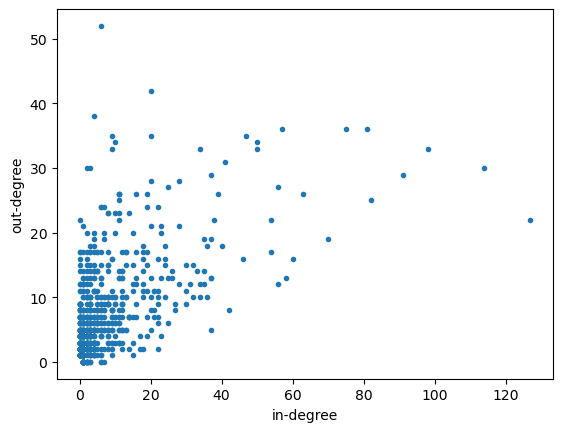

In [25]:
import matplotlib.pyplot as plt
x = list(dict(G.in_degree).values())
y = list(dict(G.out_degree).values())
plt.scatter(x, y, marker='.')
plt.xlabel("in-degree")
plt.ylabel("out-degree")

>4. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all rappers. What is the advantage of using a heatmap over the scatter plot?

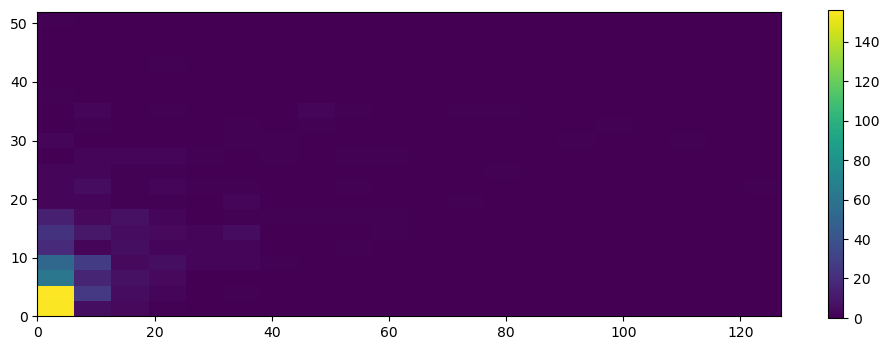

In [26]:
exclude = 0

heatmap, xedges, yedges = np.histogram2d(x[0:-exclude-1], y[0:-exclude-1], bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(12,4))
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.show()

> **Solution**: The advantage is that it allows to appreciate the concentration of data points into a small area, at the cost of not highlighting as much the outliers.

>5. Why have we used directed graphs throughout this exercise? Could we have used an undirected graph instead?

> **Solution**: Because then it wouldn't have made sense to compare in-degree and out-degree distributions.

>6. We have one more metric that we did not use. The node-attribute `content lenght`. There are two things we can investigate here.
>   * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree.
>   * Secondly, and more interestingly, it could be that famous rappers have longer texts. And that means more in-links. 
>   * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson, fit a curve to the data, you decide). Once you've tested, let me know. Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

In [27]:
out_degree = np.array(list(dict(G.out_degree).values()))
in_degree = np.array(list(dict(G.in_degree).values()))
content_length = np.array([G.nodes[node]['contentLength'] for node in G.nodes])

In [28]:
out_corr = np.corrcoef(out_degree, content_length)[0][1]
in_corr = np.corrcoef(in_degree, content_length)[0][1]

In [29]:
print("Pearson correlation coefficient")
print(f"\tOut-degree vs content length: {out_corr*100:.2f}%")
print(f"\tIn-degree vs content length: {in_corr*100:.2f}%")

Pearson correlation coefficient
	Out-degree vs content length: 37.45%
	In-degree vs content length: 59.67%


> **Solution**: Firstly, there's a loose correlation between out-degree and content-length. From what I've seen when checking some of the more extreme cases of out-degrees in the Wikipedia, that's probably because the majority of those pages tend to be formed of tables listing all their discography, with little to no explanation. Secondly, this doesn't happen in high in-degree rappers, which have a lot of text, because people have bothered to redact it. So, the in-degree and content-length correlation is stronger.   

## *Exercise 2:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise.
>1. Find the 5 most central rappers according to [degree centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html). 

In [30]:
import networkx as nx
G = DIRECTED_GRAPH
top = 5
degree_most_central = sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:top]
print(degree_most_central)

[('Snoop Dogg', 0.20523415977961434), ('Jay-Z', 0.19834710743801653), ('Nas', 0.18044077134986225), ('50 Cent', 0.1652892561983471), ('Dr. Dre', 0.16115702479338845)]


>2. Find the 5 most central rappers according to [betweenness centrality](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html?highlight=betweenness%20centrality). 
>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use betweenness centrality to define the size of the node.
>   * What role do you imagine rappers with high betweenness centrality play on  Wikipedia? 

In [31]:
import networkx as nx
G = DIRECTED_GRAPH
top = 5
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_most_central = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[0:top]
print(betweenness_most_central)

[('Snoop Dogg', 0.05085612097150196), ('Nas', 0.04884707657627663), ('Kendrick Lamar', 0.04677752897766489), ('Jay-Z', 0.0453088116651992), ('DJ Premier', 0.042368758848368444)]


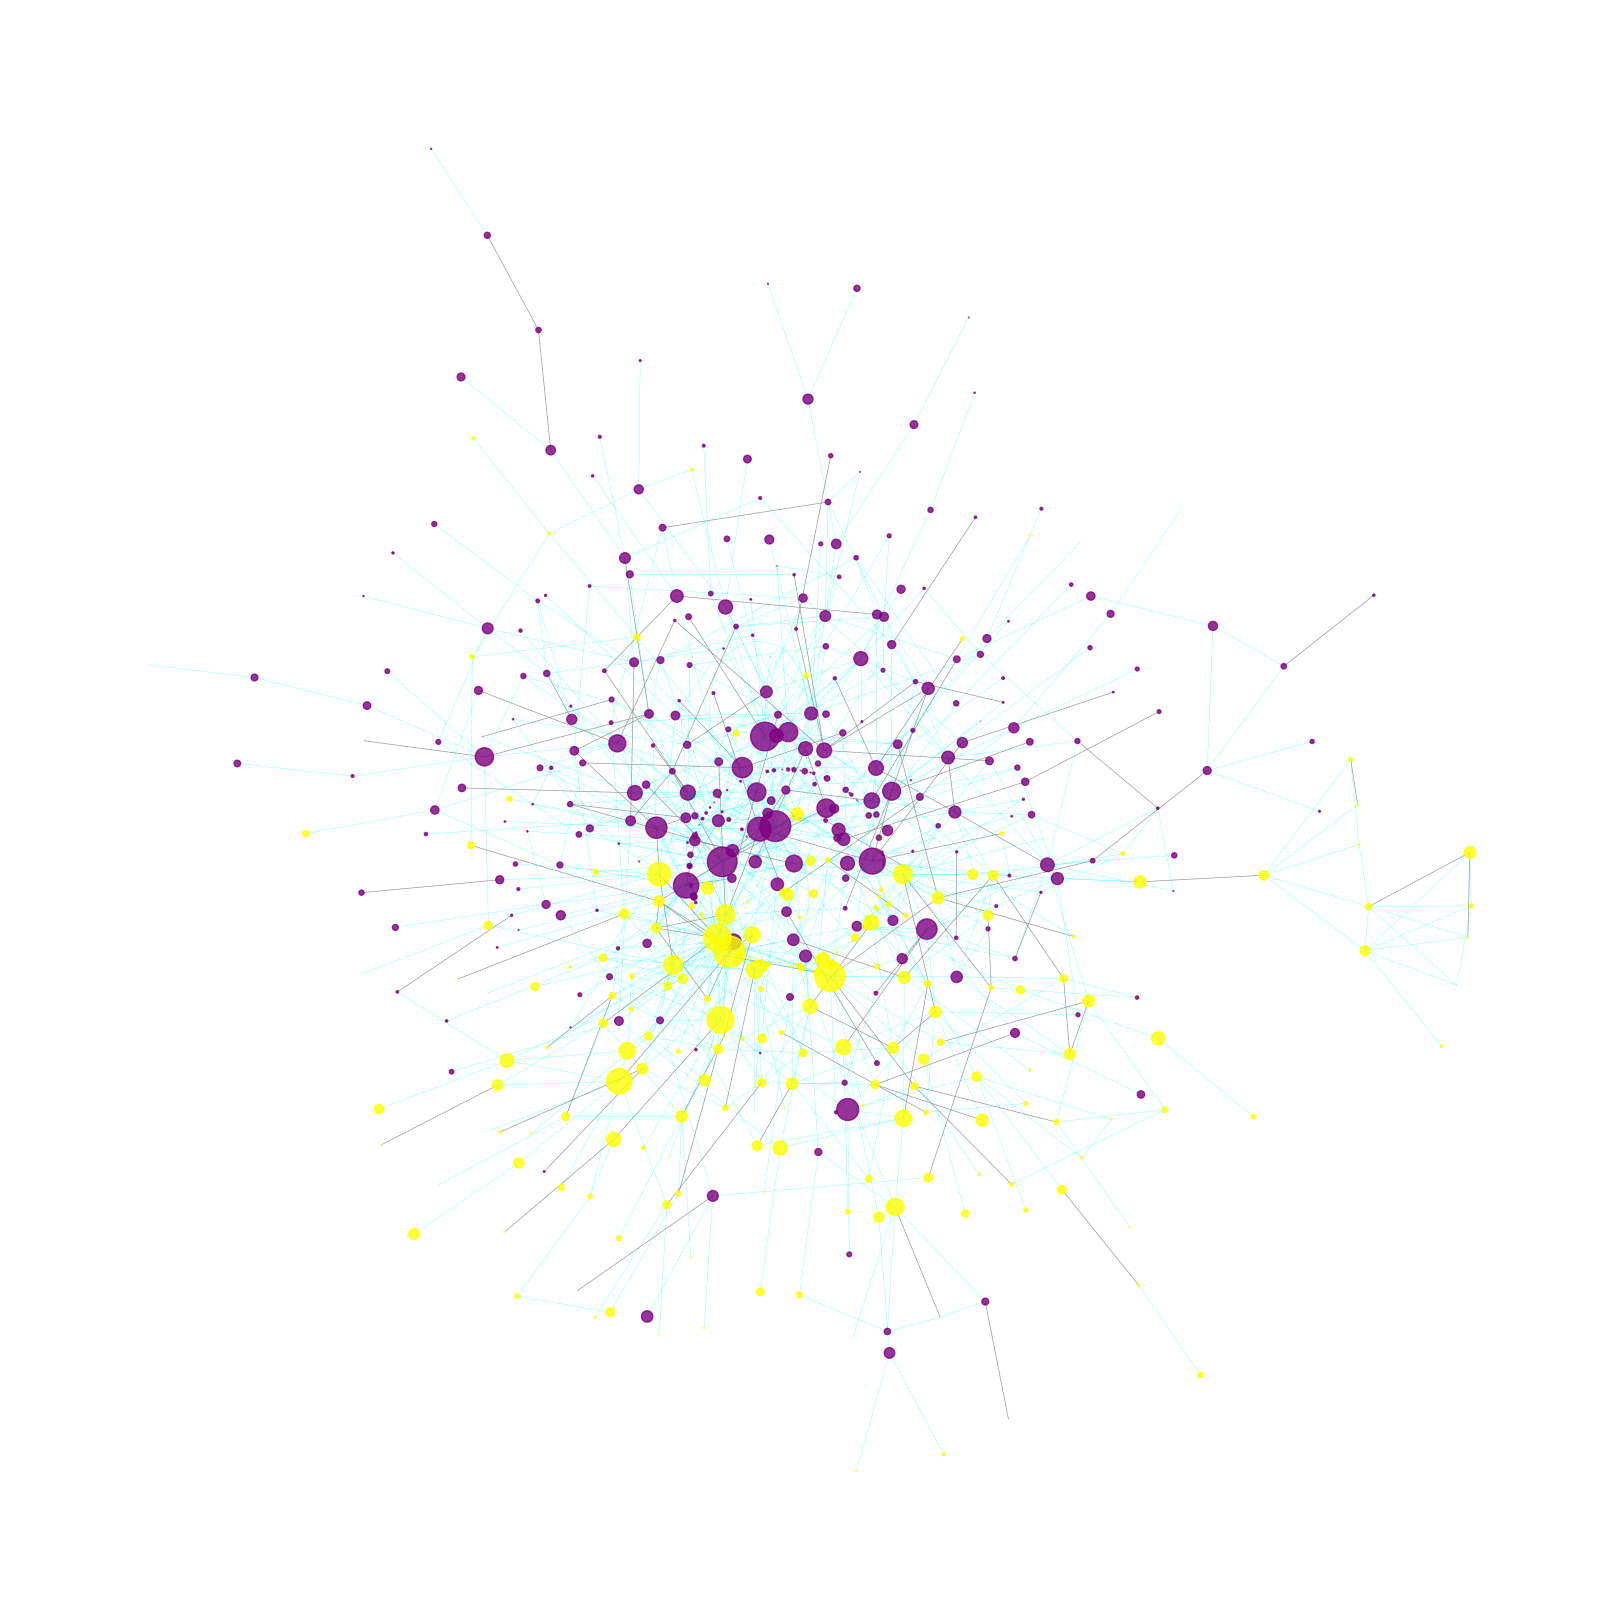

In [32]:
from matplotlib.patches import ArrowStyle
node_colors = [node_colors_dict[G.nodes[n]['coast']] for n in G.nodes()]
edge_colors = [edge_colors_dict[f"{G.nodes[u]['coast']}-{G.nodes[v]['coast']}"] for (u, v) in G.edges()]
edge_widths = [edge_widths_dict[f"{G.nodes[u]['coast']}-{G.nodes[v]['coast']}"] for (u, v) in G.edges()]
plt.figure(1,figsize=(16,16))
nx.draw_kamada_kawai(G.to_undirected(True), node_size=[v * 10000 for v in betweenness_centrality.values()], node_color = node_colors, edge_color=edge_colors,width=edge_widths, alpha=0.8)

> **Solution**: The rappers with the highest betweenness centrality have also high in-degrees and out-degrees. Due to that, they act as bridges between two rappers that don't have references to each other.

>3. Find the 5 most central rappers according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see [NetworkX documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality) for details). 
>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
>   * What role do you imagine rappers with high wikipedia graph eigenvector centrality play? 

In [33]:
import networkx as nx
G = DIRECTED_GRAPH
top = 5
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_most_central = sorted(eigenvector_centrality.items(), key=lambda x:x[1], reverse=True)[0:top]
print(eigenvector_most_central)

[('Jay-Z', 0.3031096807099119), ('50 Cent', 0.25138259499754423), ('Nas', 0.2508965834570976), ('Dr. Dre', 0.23743539062848362), ('Snoop Dogg', 0.22590328615348576)]


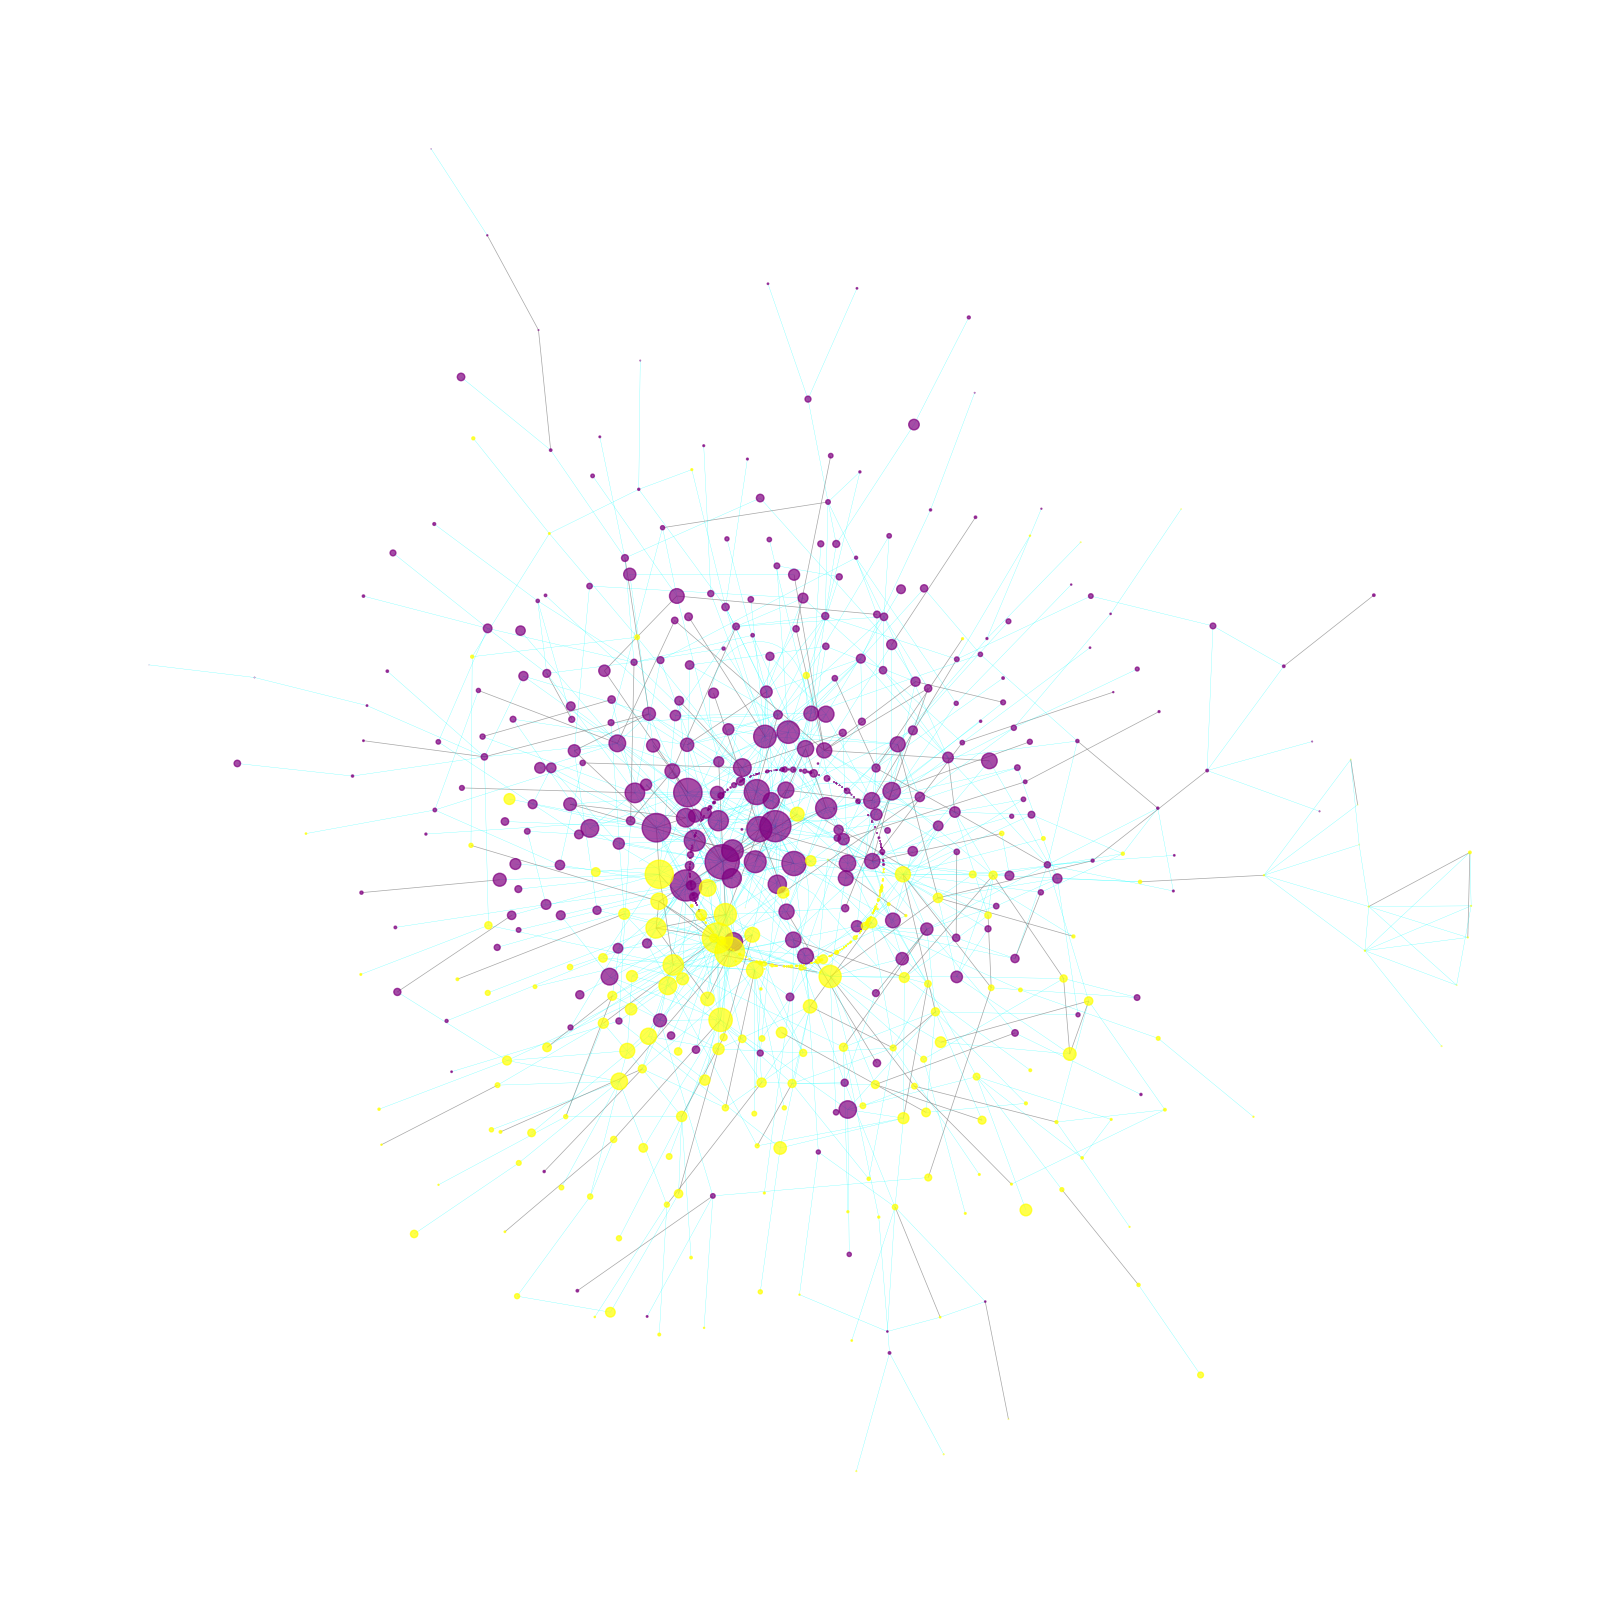

In [34]:
from matplotlib.patches import ArrowStyle
node_colors = [node_colors_dict[G.nodes[n]['coast']] for n in G.nodes()]
edge_colors = [edge_colors_dict[f"{G.nodes[u]['coast']}-{G.nodes[v]['coast']}"] for (u, v) in G.edges()]
edge_widths = [edge_widths_dict[f"{G.nodes[u]['coast']}-{G.nodes[v]['coast']}"] for (u, v) in G.edges()]
plt.figure(1,figsize=(16,16))
nx.draw_kamada_kawai(G.to_undirected(True), node_size=[v * 2000 for v in eigenvector_centrality.values()], node_color = node_colors, edge_color=edge_colors,width=edge_widths, alpha=0.7)

> **Solution**: The most central rappers are the most influential rappers that have collaborations with other influential rappers.

>4. Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree rappers tend to link to other high-degree rappers, and low-degree rappers to other low-degree rappers?). Provide an interpretation of your answer.

In [35]:
G = UNDIRECTED_GRAPH.copy()
degree_assortativity_coeff = nx.degree_pearson_correlation_coefficient(G)
print(f"Degree Pearson correlation coefficient (r): {degree_assortativity_coeff:.3f}")

Degree Pearson correlation coefficient (r): -0.035


In [36]:
average_neighbor_degrees = dict()
for node in G.nodes:
    degree_list = [G.degree[neig] for neig in G.neighbors(node)]
    value = sum(degree_list)/len(degree_list)
    if G.degree[node] not in average_neighbor_degrees.keys():
        average_neighbor_degrees[G.degree[node]] = [value]
    else:
        average_neighbor_degrees[G.degree[node]] += [value]
knn_to_graph = dict()
for degree in average_neighbor_degrees.keys():
    knn_to_graph[degree] = sum(average_neighbor_degrees[degree])/len(average_neighbor_degrees[degree])

Text(0, 0.5, 'knn (k)')

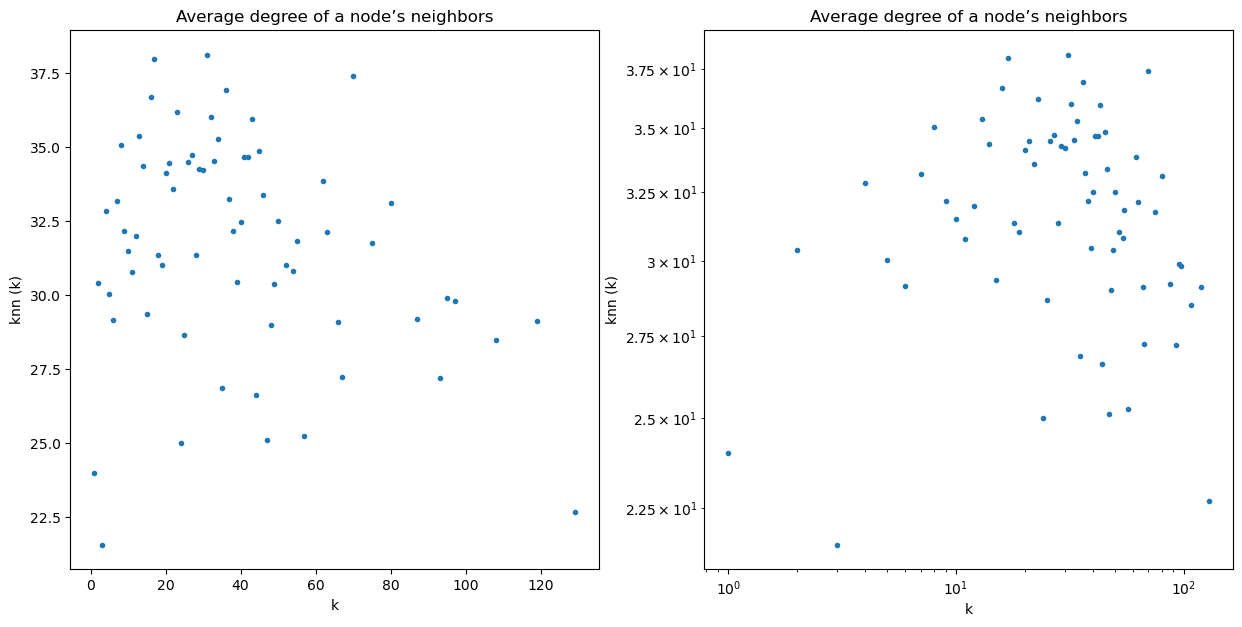

In [37]:
figsize=(15,7)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(figsize[1])
fig.set_figwidth(figsize[0])

ax1.set_title("Average degree of a node’s neighbors")
ax1.plot(knn_to_graph.keys(), knn_to_graph.values(), marker=".", linestyle = 'none')
ax1.set_xlabel("k")
ax1.set_ylabel("knn (k)")


ax2.set_title("Average degree of a node’s neighbors")
ax2.plot(knn_to_graph.keys(), knn_to_graph.values(), marker=".", linestyle = 'none')
ax2.set_xscale('log', base=10)
ax2.set_yscale('log', base=10)
ax2.set_xlabel("k")
ax2.set_ylabel("knn (k)")

> **Solution**: The Degree Pearson correlation coefficient is negative but very close to zero, which means the network is not assortative in regards to degree, as explained in Box 7.2 of the book. That's surprising, as my intuition was that it would be assortative. What these means is that influential rappers do have a really slight preference to connect to other influential rappers `(the book might be wrong, since other stuff on the internet says otherwise)`, but not significantly greater than a random network. 

>5. Is the undirected version of the graph assortative with respect do the `content length` nodal properties? (e.g. do rappers with long Wikipedia pages tend to link to other rappers with long Wiki pages, and *vice versa*?. Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.

In [38]:
G = UNDIRECTED_GRAPH
content_length_assortativity_coeff = nx.attribute_assortativity_coefficient(G,"contentLength")
print(f"Assortativity coefficient with respect to 'content length': {content_length_assortativity_coeff:.3f}")

Assortativity coefficient with respect to 'content length': -0.003


> **Solution**: The assortativity coeafficient is so close to 0 that we can say that the network is non-assortative in regards to the `content length` attribute. So no, long Wiki pages do not have an oversized (or undersized) tendency to link to other long Wiki pages. The same with short pages. 

>6. Is the undirected version of the graph assortative with respect to Coast? (e.g. west-coast rappers tending to link to west-coast rappers, etc.). Provide an interpretation of your answer.

In [39]:
G = UNDIRECTED_GRAPH
content_length_assortativity_coeff = nx.attribute_assortativity_coefficient(G,"coast")
print(f"Assortativity coefficient with respect to 'coast': {content_length_assortativity_coeff:.3f}")

Assortativity coefficient with respect to 'coast': 0.528


> **Solution**: The assortativity coeafficient is >.5, so we can say that there's a strong assortativity in regards to the 'coast' property. This makes sense, taking into account the analysis performed in Week 4. 

>7. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?
>   * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.

In [40]:
G = UNDIRECTED_GRAPH
N = len(G.nodes)
p =  len(G.edges)/(N*(N-1)/2)
random_G = nx.gnp_random_graph(N,p, seed=SEED)
print(f"Rapper network <d>:\t{nx.average_shortest_path_length(G)}\nRandom network <d>:\t{nx.average_shortest_path_length(random_G)}")

Rapper network <d>:	2.991072409729406
Random network <d>:	2.7904517224262126


In [41]:
shortest_paths = [el for el in nx.shortest_path_length(G)]
spaths = dict()
for el in shortest_paths:
    del el[1][el[0]]
    spaths[el[0]] = sum(el[1].values())/len(el[1])
shortest_paths = [el for el in nx.shortest_path_length(random_G)]
rand_spaths = dict()
for el in shortest_paths:
    del el[1][el[0]]
    rand_spaths[el[0]] = sum(el[1].values())/len(el[1])

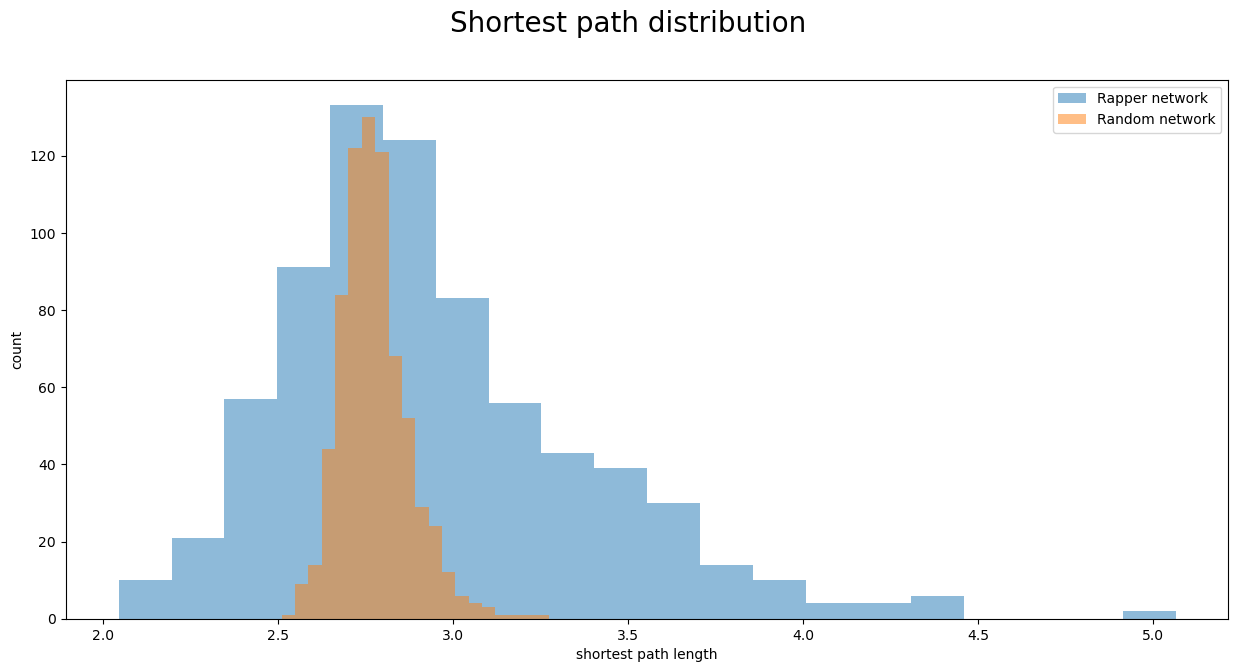

In [42]:
title = "Shortest path distribution"
n_bins = 20

frq, edges = np.histogram(a= list(spaths.values()), bins=n_bins)
rand_frq, rand_edges = np.histogram(a= list(rand_spaths.values()), bins=n_bins)

import matplotlib.pyplot as plt
from math import log
fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(14)
fig.suptitle(title, fontsize=20)
fig.set_figheight(figsize[1])
fig.set_figwidth(figsize[0])

ax1.hist(edges[:-1], n_bins, weights=frq, alpha = 0.5,  label='Rapper network')
ax1.hist(rand_edges[:-1], n_bins, weights=rand_frq, alpha = 0.5, label='Random network')
ax1.set_xlabel("shortest path length")
ax1.set_ylabel("count")
ax1.legend()

> **Solution**: Both types of networks have similar average shortest paths, with the rapper network's $\langle d \rangle$ being slightly higher. In the distribution plot, we can see that the rapper network is slightly heavier in the right side, which is consistent with the previous observation. Also, and more importantly, the distribution differs a lot because, even if both are higher in the center, the random network is much heavier in the mean, while the rapper network has much more higher and lower shortest path values (heavy tails).

## *Exercise 3*: Is the coast of a rapper important for the network structure? Let us explore if and how it shapes the network (use the undirected network). 

In [113]:
G = UNDIRECTED_GRAPH.copy()

>1. Compute the average node centrality for west-coast and east-coast rappers respectively. You are free to choose your favourite centrality measure or compare different ones. Which coast do the more central rappers have?

In [114]:
import networkx as nx
def compareCentralityMeasures(G, toPrint=True):
    rappers_west = [r for r in G.nodes if G.nodes[r]['coast'] == 'west']
    rappers_east = [r for r in G.nodes if G.nodes[r]['coast'] == 'east']
    rapper_names = {'west': rappers_west, 'east':rappers_east}
    centrality_measures = {'degree': nx.degree_centrality,  'betweenness': nx.betweenness_centrality, 'eigenvector': nx.eigenvector_centrality}
    coasts = ['east', 'west']
    res = dict()

    for cm in centrality_measures.keys():
        res[cm] = dict()
        temp_measure = centrality_measures[cm](G)
        for coast in coasts:
            res[cm][coast] = np.average([temp_measure[m] for m in temp_measure if m in rapper_names[coast]])
    if toPrint:
        print('Format:\t\t\teast\twest\teast/west%')
        for k in res:
            print(f"\t{k:<12}:\t{res[k]['east']:.4f}\t{res[k]['west']:.4f}\t{100*(res[k]['east']/res[k]['west']-1):.2f}%")
    return res

In [116]:
centrality_rapper_network = compareCentralityMeasures(G)

Format:			east	west	east/west%
	degree      :	0.0201	0.0168	19.21%
	betweenness :	0.0027	0.0028	-4.07%
	eigenvector :	0.0259	0.0195	32.76%


> **Solution**: If we compare coasts with every centrality measure, we can see that in the case of degree centrality and eigenvector centrality, east coast rappers are significantly more central. Although west coast rappers are more central on average if we measure betweenness centrality, the differnence is slight. So we can conclude that east coast rappers are more central.

>2. Create a randomized version of the full graph, where the association between nodes and coast is shuffled. Compute the average centrality of west-coast and east-coast rappers for this randomized graph. 
>   * **Hint**: To create this shuffling, simply give everyone a random coast assignment (but with the same number of west-coast and east-coast rappers as in the real data). The way I usually create random lables is by using either [`random.shuffle`](https://docs.python.org/3/library/random.html#random.shuffle) or [`numpy.random.permutation`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.permutation.html).

In [72]:
import random
random.seed(SEED)
coast_distribution = [G.nodes[r]['coast'] for r in G.nodes]
random.shuffle(coast_distribution)
for i, r in enumerate(G.nodes):
    G.nodes[r]['coast'] = coast_distribution[i]

t = compareCentralityMeasures(G)

Format:			east	west	east/west%
	degree      :	0.0184	0.0191	-3.64%
	betweenness :	0.0028	0.0027	4.24%
	eigenvector :	0.0226	0.0240	-5.64%


> **Solution**: When we randomize the coast distribution in the graph, the differences diminish. There's still a somewhat significant difference between both coasts in every centrality measure. Degree and eigenvector centrality point to the same direction again - in this case, the west coast rappers are more central, on average. Betweenness centrality, suggests the opposite. 

>3. Repeat the shuffling process above 1000 times (at least) and plot two histograms, each histogram with the 1000 corresponding average values of centrality obtained for west-coast and east-coast rappers in the shuffeled netowrks.

In [71]:
centrality_measures = {'degree': nx.degree_centrality,  'betweenness': nx.betweenness_centrality, 'eigenvector': nx.eigenvector_centrality}

iterations = 1000
values = []


for i in range(iterations):
    random.seed(SEED+i)
    coast_distribution = [G.nodes[r]['coast'] for r in G.nodes]
    random.shuffle(coast_distribution)
    for i, r in enumerate(G.nodes):
        G.nodes[r]['coast'] = coast_distribution[i]
    values.append(compareCentralityMeasures(G, toPrint=False))

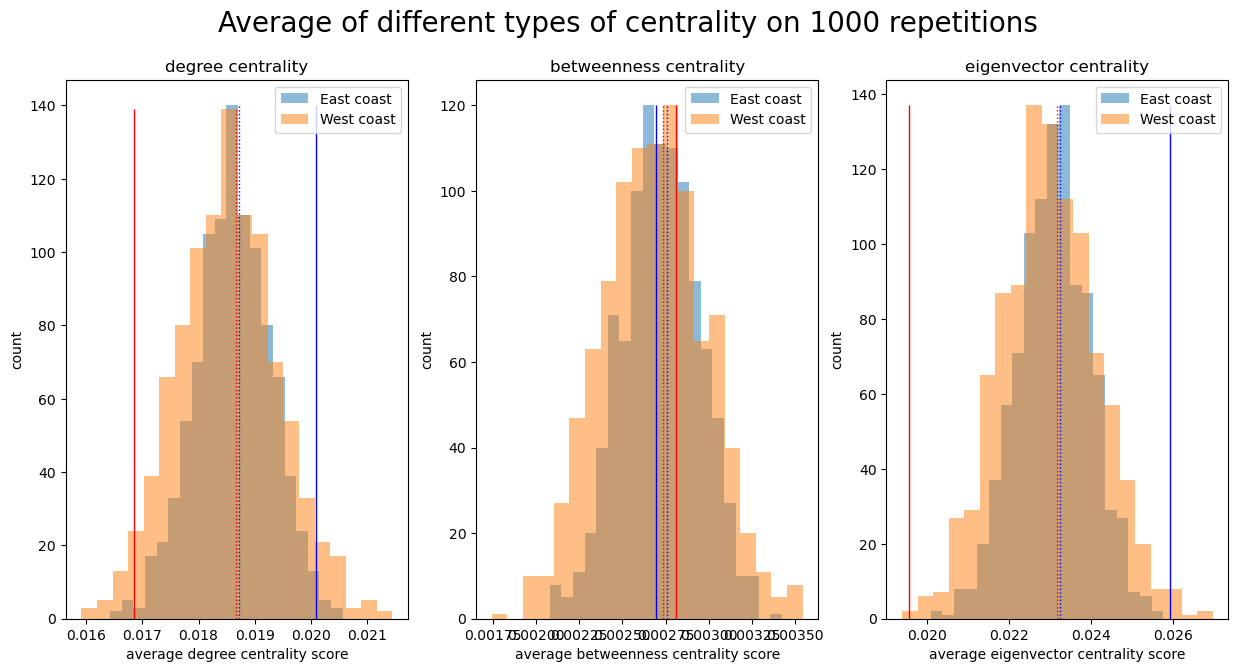

In [117]:
fig, axs = plt.subplots(1, 3)
averages = dict()
for i, cm in enumerate(centrality_measures.keys()):
    title = f"Average of different types of centrality on {iterations} repetitions"
    n_bins = 20
    values_to_plot = dict()
    averages[cm] = dict()
    for coast in ['east', 'west']:
        values_to_plot[coast] = [el[cm][coast] for el in values]
    
    east_frq, east_edges = np.histogram(a= values_to_plot['east'], bins=n_bins)
    west_frq, west_edges = np.histogram(a= values_to_plot['west'], bins=n_bins)

    fig.set_figwidth(20)
    fig.suptitle(title, fontsize=20)
    fig.set_figheight(figsize[1])
    fig.set_figwidth(figsize[0])

    axs[i].hist(east_edges[:-1], n_bins, weights=east_frq, alpha = 0.5,  label='East coast')
    axs[i].hist(west_edges[:-1], n_bins, weights=west_frq, alpha = 0.5, label='West coast')
    axs[i].set_xlabel(f"average {cm} centrality score")
    axs[i].set_ylabel("count")
    axs[i].set_title(f"{cm} centrality")
    axs[i].legend()
    
    averages[cm]['east'] = np.average(values_to_plot['east'])
    averages[cm]['west'] = np.average(values_to_plot['west'])
    axs[i].vlines(x=averages[cm]['east'], ymin=0, ymax=np.max(east_frq), colors='blue', ls=':', lw=1, label='east coast average')
    axs[i].vlines(x=averages[cm]['west'] , ymin=0, ymax=np.max(west_frq), colors='red', ls=':', lw=1, label='west coast average')

    
    axs[i].vlines(x=centrality_rapper_network[cm]['east'], ymin=0, ymax=np.max(east_frq), colors='blue', ls='-', lw=1, label='east coast average')
    axs[i].vlines(x=centrality_rapper_network[cm]['west'] , ymin=0, ymax=np.max(west_frq), colors='red', ls='-', lw=1, label='west coast average')


> **Comments**: Dashed line represents the mean of the different types of centrality measures. The straight line represent the values of the rapper network.

In [107]:
print('Format:\t\t\teast\twest\teast/west%')
for k in averages:
    print(f"\t{k:<12}:\t{averages[k]['east']:.4f}\t{averages[k]['west']:.4f}\t{100*(averages[k]['east']/averages[k]['west']-1):.2f}%")

Format:			east	west	east/west%
	degree      :	0.0187	0.0187	0.34%
	betweenness :	0.0028	0.0027	0.85%
	eigenvector :	0.0232	0.0232	0.31%


> **Solution**: The differences disappear when we repeat the shuffling 1000 times. In the graph we can see that the distribution is similar and when we calculate the average, we can see it's practically the same in all centrality measures.

>4. Compare the value you have obtained in the real graph, with the randomized cases. Are rappers from one coast more central in the network (on average)?

> **Solution**: As said before, the randomized cases revert to no difference between cosats. For the real graph we can see that in the case of degree centrality and eigenvector centrality, east coast rappers are significantly more central. Although west coast rappers are more central on average if we measure betweenness centrality, the differnence is slight. So we can conclude that east coast rappers are more central.

Furthermore, we can see that the values for degree and eigenvector centralities in the rapper network correspond to pretty extreme values compared to the possible ranges obtained from the same measures obtained from randomized networks. In the case of betweenness centrality we don't see that. We can then say, with high confidence, that indeed the east coast rappers are more central, at least in regards degree and eigenvector centrality measures.

>5. Think about your results, what could be possible explanations for what you observe?

The shuffling procedure you just carried out is often called a _permutation test_. It is a super powerful tool that we use all the time. Once you start to think about it, you can answer many questions of the type "Is [property] higher/lower in this network than one might have expected by chance?" with permutation tests.

> **Solution**: We can conclude that the conclusions explained in question 2 and question 4 (regarding the centrality of rappers depending on which coast they are from) are real properties, since when we randomize the distribution of the rappers in each coast, these same properties do not present themselves.